In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from numpy import expand_dims
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, BatchNormalization
from tensorflow.keras.optimizers import Nadam, Adam, SGD, Adadelta, Adamax

%matplotlib inline

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
path = 'drive/MyDrive/brain_tumor_dataset/'

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
list_dir = os.listdir(path)

In [51]:
print(list_dir)

['yes', 'no']


In [52]:
yes = cv2.imread('drive/MyDrive/brain_tumor_dataset/yes/Y1.jpg')
no = cv2.imread('drive/MyDrive/brain_tumor_dataset/no/19 no.jpg')

In [116]:
#plt.imshow(yes)
#plt.show()

In [54]:
#plt.imshow(no)

In [130]:
    name_path_yes = []
    height_yes=[]
    width_yes=[]
    channels_yes=[]

    for i in os.listdir(path+'yes/'):
        item = cv2.imread(path + 'yes/' + i)
        item.shape
        name_path_yes.append(path + 'yes/' + i)
        height_yes.append(item.shape[0])
        width_yes.append(item.shape[1])
        channels_yes.append(item.shape[2])
        

In [131]:
train_df = pd.DataFrame(columns=['name', 'width', 'height', 'ch', 'class'])
train_df['name'], train_df['width'], train_df['height'], train_df['ch'], train_df['class'] = name_path_yes, width_yes, height_yes, channels_yes, 'yes'
train_df.tail()

,name,width,height,ch,class
150,drive/MyDrive/brain_tumor_dataset/yes/Y168.jpg,263,300,3,yes
151,drive/MyDrive/brain_tumor_dataset/yes/Y33.jpg,512,512,3,yes
152,drive/MyDrive/brain_tumor_dataset/yes/Y54.jpg,300,325,3,yes
153,drive/MyDrive/brain_tumor_dataset/yes/Y56.jpg,211,239,3,yes
154,drive/MyDrive/brain_tumor_dataset/yes/Y69.jpg,504,630,3,yes


In [132]:
name_path_no = []
height_no=[]
width_no=[]
channels_no=[]

for i in os.listdir(path+'no/'):
    item = cv2.imread(path + 'no/' + i)
    item.shape
    name_path_no.append(path + 'no/' + i)
    height_no.append(item.shape[0])
    width_no.append(item.shape[1])
    channels_no.append(item.shape[2])

In [133]:
no_df = pd.DataFrame(columns=['name', 'width', 'height', 'ch', 'class'])
no_df['name'], no_df['width'], no_df['height'], no_df['ch'], no_df['class'] = name_path_no, height_no, width_no, channels_no, 'no'
no_df.head()

,name,width,height,ch,class
0,drive/MyDrive/brain_tumor_dataset/no/11 no.jpg,168,300,3,no
1,drive/MyDrive/brain_tumor_dataset/no/1 no.jpeg,630,630,3,no
2,drive/MyDrive/brain_tumor_dataset/no/10 no.jpg,201,173,3,no
3,drive/MyDrive/brain_tumor_dataset/no/28 no.jpg,251,201,3,no
4,drive/MyDrive/brain_tumor_dataset/no/4 no.jpg,250,201,3,no


In [134]:
no_df.width.unique()

array([ 168,  630,  201,  251,  250,  225,  214,  262,  238,  197,  242,
        474,  221,  252,  222,  213,  282,  231,  614,  243,  442,  217,
        234,  326,  417,  259,  248,  194,  200,  530,  192,  183,  393,
        198, 1024,  338,  750,  244,  664,  537,  236,  361,  512,  301,
        540,  400,  444,  725,  340,  275,  454,  257,  449,  280,  264,
       1080,  680])

In [135]:
no_df.height.unique()

array([ 300,  630,  173,  201,  225,  235,  227,  212,  177,  208,  356,
        228,  200,  236,  230,  218,  207,  441,  232,  215,  276,  428,
        194,  259,  380,  192,  275,  350,  150, 1024,  442,  750,  206,
        550,  472,  214,  642,  512,  504,  393,  468,  728,  339,  400,
        220,  409,  196,  359,  420,  210, 1920,  680])

In [136]:
no_df.ch.unique()


array([3])

In [62]:
print(no_df.width.min(), no_df.height.min())

168 150


In [143]:
#Test
test_df = train_df.iloc[-10:, :]

In [144]:
test_df

,name,width,height,ch,class
145,drive/MyDrive/brain_tumor_dataset/yes/Y8.jpg,450,446,3,yes
146,drive/MyDrive/brain_tumor_dataset/yes/Y113.JPG,254,312,3,yes
147,drive/MyDrive/brain_tumor_dataset/yes/Y55.jpg,620,620,3,yes
148,drive/MyDrive/brain_tumor_dataset/yes/Y111.JPG,272,324,3,yes
149,drive/MyDrive/brain_tumor_dataset/yes/Y14.jpg,289,300,3,yes
150,drive/MyDrive/brain_tumor_dataset/yes/Y168.jpg,263,300,3,yes
151,drive/MyDrive/brain_tumor_dataset/yes/Y33.jpg,512,512,3,yes
152,drive/MyDrive/brain_tumor_dataset/yes/Y54.jpg,300,325,3,yes
153,drive/MyDrive/brain_tumor_dataset/yes/Y56.jpg,211,239,3,yes
154,drive/MyDrive/brain_tumor_dataset/yes/Y69.jpg,504,630,3,yes


In [147]:
train_df.drop(train_df.index[145:155], inplace=True)


In [148]:
len(train_df.index)

145

In [151]:
test_df_no = no_df.iloc[-10:, :]


In [152]:
test_df_no

,name,width,height,ch,class
88,drive/MyDrive/brain_tumor_dataset/no/no 99.jpg,442,409,3,no
89,drive/MyDrive/brain_tumor_dataset/no/No11.jpg,630,630,3,no
90,drive/MyDrive/brain_tumor_dataset/no/no 100.jpg,225,225,3,no
91,drive/MyDrive/brain_tumor_dataset/no/N3.jpg,275,220,3,no
92,drive/MyDrive/brain_tumor_dataset/no/N6.jpg,257,196,3,no
93,drive/MyDrive/brain_tumor_dataset/no/No22.jpg,449,359,3,no
94,drive/MyDrive/brain_tumor_dataset/no/no 90.jpg,280,420,3,no
95,drive/MyDrive/brain_tumor_dataset/no/N26.JPG,264,210,3,no
96,drive/MyDrive/brain_tumor_dataset/no/no 9.png,1080,1920,3,no
97,drive/MyDrive/brain_tumor_dataset/no/No19.jpg,680,680,3,no


In [153]:
no_df.drop(no_df.index[88:98], inplace=True)

In [154]:
len(no_df.index)

88

In [155]:
test = test_df.append(test_df_no, ignore_index = True) 

In [156]:
len(test.index)

20

In [157]:
#Train test
train = train_df.append(no_df, ignore_index = True) 

In [158]:
len(train.index)

233

In [159]:
#Veri Çerçeveleri
train.head()

,name,width,height,ch,class
0,drive/MyDrive/brain_tumor_dataset/yes/Y30.jpg,300,325,3,yes
1,drive/MyDrive/brain_tumor_dataset/yes/Y3.jpg,456,519,3,yes
2,drive/MyDrive/brain_tumor_dataset/yes/Y154.jpg,400,431,3,yes
3,drive/MyDrive/brain_tumor_dataset/yes/Y62.jpg,250,294,3,yes
4,drive/MyDrive/brain_tumor_dataset/yes/Y115.JPG,260,298,3,yes


In [161]:
test

,name,width,height,ch,class
0,drive/MyDrive/brain_tumor_dataset/yes/Y8.jpg,450,446,3,yes
1,drive/MyDrive/brain_tumor_dataset/yes/Y113.JPG,254,312,3,yes
2,drive/MyDrive/brain_tumor_dataset/yes/Y55.jpg,620,620,3,yes
3,drive/MyDrive/brain_tumor_dataset/yes/Y111.JPG,272,324,3,yes
4,drive/MyDrive/brain_tumor_dataset/yes/Y14.jpg,289,300,3,yes
5,drive/MyDrive/brain_tumor_dataset/yes/Y168.jpg,263,300,3,yes
6,drive/MyDrive/brain_tumor_dataset/yes/Y33.jpg,512,512,3,yes
7,drive/MyDrive/brain_tumor_dataset/yes/Y54.jpg,300,325,3,yes
8,drive/MyDrive/brain_tumor_dataset/yes/Y56.jpg,211,239,3,yes
9,drive/MyDrive/brain_tumor_dataset/yes/Y69.jpg,504,630,3,yes


In [77]:
shape = 112
batch_size = 32
learn_r = 0.001


In [227]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=30, width_shift_range=0.2, 
                                   height_shift_range=0.2, zoom_range=0.1, vertical_flip=True, horizontal_flip=True, validation_split=0.2)

In [228]:
train_generator = train_datagen.flow_from_dataframe(train, target_size=(shape, shape),batch_size=batch_size,class_mode='binary',subset='training', 
                                                   x_col='name',y_col="class", color_mode="rgb", shuffle=True)

validation_generator = train_datagen.flow_from_dataframe(train, target_size=(shape, shape),batch_size=batch_size,class_mode='binary',subset='validation', 
                                                   x_col='name',y_col="class", color_mode="rgb", shuffle=True)

Found 187 validated image filenames belonging to 2 classes.
Found 46 validated image filenames belonging to 2 classes.


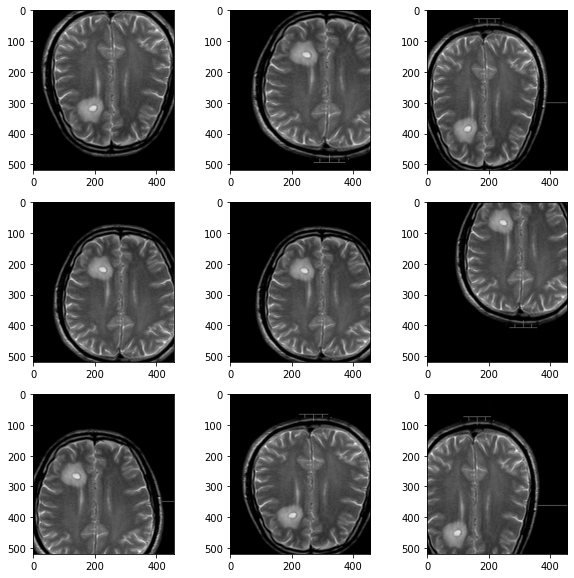

In [229]:
img = load_img(path+'yes/Y3.jpg')

f,ax = plt.subplots(figsize=(10,10))
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(width_shift_range=0.2,zoom_range=0.1,height_shift_range=0.2,vertical_flip=1)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	pyplot.imshow(image)
pyplot.show()

In [97]:
#create model
from tensorflow.keras.applications import VGG16, VGG19, EfficientNetB7, Xception, InceptionV3
opt_1 = SGD(learning_rate=learn_r, momentum=0.9)
opt_2 = Adam(learning_rate= learn_r)
opt_3 = Nadam(learning_rate= learn_r)
opt_4 = Adamax(learning_rate= learn_r, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [98]:
apps = [VGG16, VGG19, EfficientNetB7, Xception, InceptionV3]

In [99]:
def get_model():    
    base_model =  apps[4](input_shape=(shape,shape,3), weights='imagenet', include_top=False, pooling='avg')
    x = base_model.output
    x = Dropout(0.1)(x)
    predictions = Dense(1, activation="sigmoid")(x)
    return Model(inputs=base_model.input, outputs=predictions)

In [245]:
model = keras.models.Sequential([
  keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(shape, shape, 3)),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Conv2D(64, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Flatten(),
  keras.layers.Dense(20, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

In [246]:
#model = get_model()
#opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= 'accuracy')

In [247]:
history = model.fit_generator(train_generator, epochs=30, validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/30
6/6 [==============================] - 8s 1s/step - loss: 0.7009 - accuracy: 0.5882 - val_loss: 0.5751 - val_accuracy: 0.9783
Epoch 2/30
6/6 [==============================] - 7s 1s/step - loss: 0.6565 - accuracy: 0.6043 - val_loss: 0.5731 - val_accuracy: 0.6957
Epoch 3/30
6/6 [==============================] - 7s 1s/step - loss: 0.6663 - accuracy: 0.5775 - val_loss: 0.5679 - val_accuracy: 0.6522
Epoch 4/30
6/6 [==============================] - 7s 1s/step - loss: 0.6218 - accuracy: 0.6684 - val_loss: 0.4768 - val_accuracy: 0.8478
Epoch 5/30
6/6 [==============================] - 7s 1s/step - loss: 0.6281 - accuracy: 0.6952 - val_loss: 0.4266 - val_accuracy: 0.8696
Epoch 6/30
6/6 [==============================] - 7s 1s/step - loss: 0.5914 - accuracy: 0.6952 - val_loss: 0.5394 - val_accuracy: 0.7609
Epoch 7/30
6/6 [==============================] - 7s 1s/step - loss: 0.5611 - accuracy: 0.7540 - val_loss: 0.2810 - val_accuracy: 0.9565
Epoch 8/30
6/6 [=========================

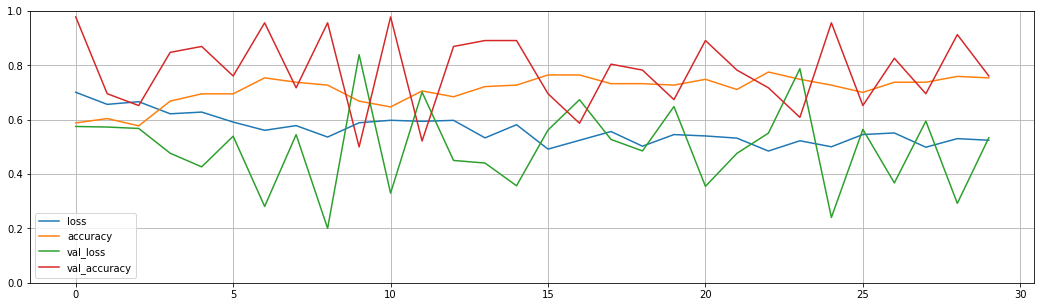

In [248]:
pd.DataFrame(history.history).plot(figsize=(18, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [250]:
#start testing
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_dataframe(test, x_col='name', y_col='class', batch_size= 1, shuffle=False, target_size=(shape,shape))

Found 20 validated image filenames belonging to 2 classes.


In [251]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1)

 1/20 [>.............................] - ETA: 2s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


20/20 [==============================] - 0s 17ms/step


In [252]:
test_generator.class_indices

{'no': 0, 'yes': 1}

In [253]:
test_generator.filenames

['drive/MyDrive/brain_tumor_dataset/yes/Y8.jpg',
 'drive/MyDrive/brain_tumor_dataset/yes/Y113.JPG',
 'drive/MyDrive/brain_tumor_dataset/yes/Y55.jpg',
 'drive/MyDrive/brain_tumor_dataset/yes/Y111.JPG',
 'drive/MyDrive/brain_tumor_dataset/yes/Y14.jpg',
 'drive/MyDrive/brain_tumor_dataset/yes/Y168.jpg',
 'drive/MyDrive/brain_tumor_dataset/yes/Y33.jpg',
 'drive/MyDrive/brain_tumor_dataset/yes/Y54.jpg',
 'drive/MyDrive/brain_tumor_dataset/yes/Y56.jpg',
 'drive/MyDrive/brain_tumor_dataset/yes/Y69.jpg',
 'drive/MyDrive/brain_tumor_dataset/no/no 99.jpg',
 'drive/MyDrive/brain_tumor_dataset/no/No11.jpg',
 'drive/MyDrive/brain_tumor_dataset/no/no 100.jpg',
 'drive/MyDrive/brain_tumor_dataset/no/N3.jpg',
 'drive/MyDrive/brain_tumor_dataset/no/N6.jpg',
 'drive/MyDrive/brain_tumor_dataset/no/No22.jpg',
 'drive/MyDrive/brain_tumor_dataset/no/no 90.jpg',
 'drive/MyDrive/brain_tumor_dataset/no/N26.JPG',
 'drive/MyDrive/brain_tumor_dataset/no/no 9.png',
 'drive/MyDrive/brain_tumor_dataset/no/No19.jpg']

In [254]:
print(len(test_generator.filenames))

20


In [255]:
predict = []
for i in pred:
    if i < 0.5:
        print('no')
        predict.append('no')
    else:
        print('yes')
        predict.append('yes')
    

no
yes
yes
yes
yes
yes
no
yes
yes
yes
no
no
no
no
yes
no
no
no
no
no


In [256]:
count = 0
for i in range(20):
  if (i<10):
    if predict[i] == 'yes':
      count += 1
  else:
    if predict[i] == 'no':
      count += 1
print("Test accuracy: "+ str(count/len(test_generator.filenames)))

Test accuracy: 0.85


In [197]:
results = pd.DataFrame(columns=['Filename', 'Predictions'])

In [198]:
results.head()

,Filename,Predictions


In [199]:
results['Filename']= test_generator.filenames

In [200]:
results['Predictions']=predict

yes


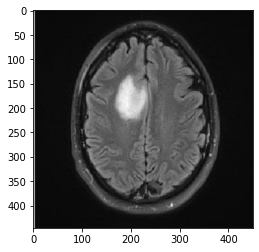

yes


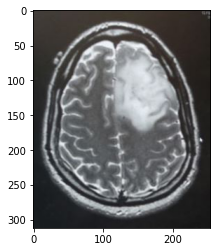

yes


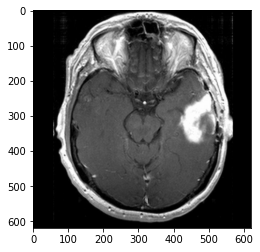

yes


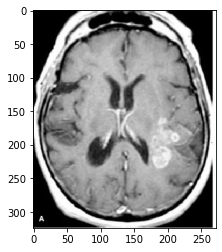

yes


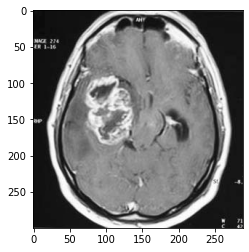

yes


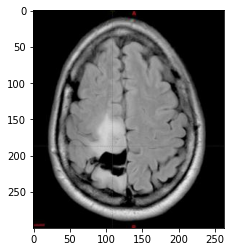

no


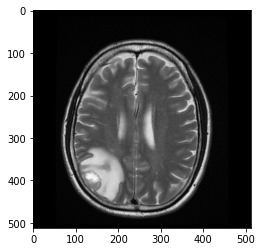

yes


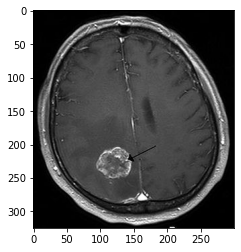

yes


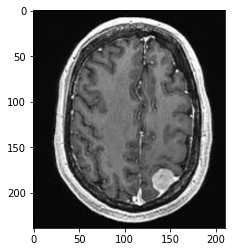

yes


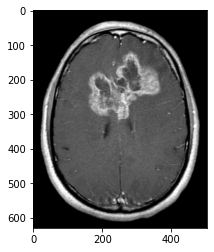

no


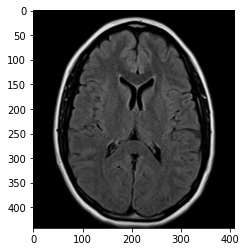

no


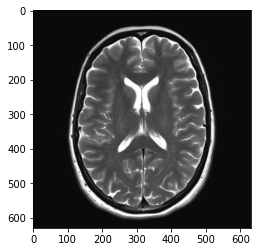

no


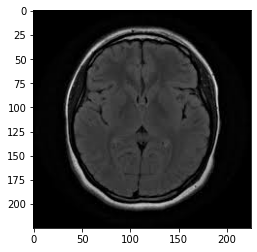

no


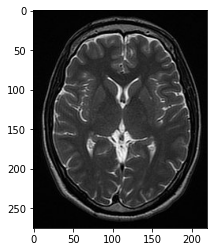

yes


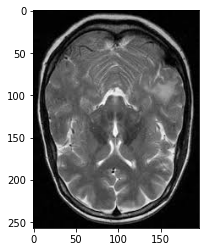

no


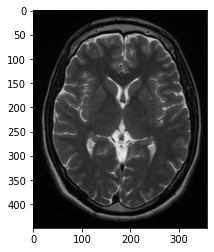

no


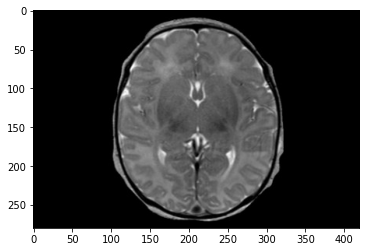

no


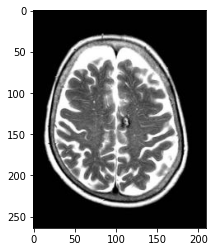

no


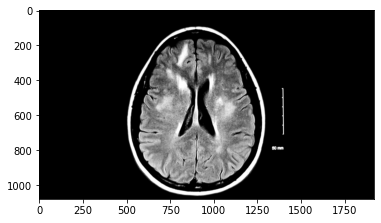

no


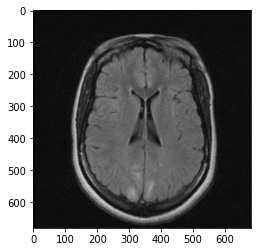

In [201]:
for pic, name in zip(results['Filename'], results['Predictions']): 
    img = load_img(pic)
    plt.imshow(img)
    print(name)   
    plt.show()